<a href="https://colab.research.google.com/github/yeop6033/datamining/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

목표 :  생존예측하기!

In [ ]:
import pandas as pd
import numpy as np

시각화 패키지 : plotly,chart_studio <-- 최근에 더 세련된 데이터 시각화 패키지 \
머신러닝 분석 : sklearn

In [ ]:
!pip install plotly
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


알아두면 꿀팁\
코렙에서 from google.colab import files 사용시 파일을 바로 가져올수 있습니다

In [ ]:
from google.colab import files
testdata = files.upload()
traindata = files.upload()
genderdata=files.upload()


Saving test.csv to test (5).csv


Saving train.csv to train (3).csv


Saving gender_submission.csv to gender_submission (1).csv


In [ ]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
submission=pd.read_csv("gender_submission.csv")

In [ ]:
#제대로 돌아가는지 확인하기
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<데이터 전처리>

In [ ]:
#train,test 데이터 확인하기
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

알아두기
데이터 정리할때 .sort_values 쓰게 되면 데이터 값은 오름 차순 정렬, 결측치가 있으면 맨마지막에 위치하게됨

In [ ]:
train.dtypes.sort_values()
# test.dtypes.sort_values()

PassengerId      int64
Survived         int64
Pclass           int64
SibSp            int64
Parch            int64
Age            float64
Fare           float64
Name            object
Sex             object
Ticket          object
Cabin           object
Embarked        object
dtype: object

결측치 확인\
1.Cabin 방 \
2.Embarked 선실\
3.Age 나이\
4.Fare 요금

In [ ]:
#train결측여부 확인 .isnull()
train.isnull()
#True는 1 False는 0 임으로 0보다 큰수를 전부 더하면 결측치가 몇개있는지 확인
train.isnull().sum()[train.isnull().sum()>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [ ]:
test.isnull().sum()[test.isnull().sum()>0]

Age       86
Fare       1
Cabin    327
dtype: int64

In [ ]:
#결측치있는지 확인함
# train.isnull().sum()
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**데이터 가공시 함부로 데이터를 삭제하거나 변경하면 안됨으로 결측치를 N으로 변경\

결측값 대체하기 .fillna

In [ ]:
#Cabind은 방이름임으로 결측데이터를 N으로 변경
# train['Cabin'] =train['Cabin'].str[0]
train['Cabin']=train['Cabin'].fillna('N') 

In [ ]:
train['Cabin']

0         N
1       C85
2         N
3      C123
4         N
       ... 
886       N
887     B42
888       N
889    C148
890       N
Name: Cabin, Length: 891, dtype: object

In [ ]:
test['Cabin']=test['Cabin'].fillna("N")
test['Cabin']

0         N
1         N
2         N
3         N
4         N
       ... 
413       N
414    C105
415       N
416       N
417       N
Name: Cabin, Length: 418, dtype: object

In [ ]:
train['Embarked']=train['Embarked'].fillna('unknown')
train['Age']=train['Age'].fillna(train['Age'].mean())

In [ ]:
#test의 요금 Fare은 하나만 없으므로 train['Fare']에서 평균 값으로 대체
test.Fare=test.Fare.fillna(train.Fare.mean())

In [ ]:
test['Fare']

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

전처리작업 끝난후 데이터 탐색

In [ ]:
# 성별과 생존률  ---> 생존에 대해 count
train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

ploty 사용해봄\
import plotly.express as px\
import plotly.graph_objects as bar\
배운게 import matplotlib.pyplot as plt이거라 더 matplot이 더편한거 같음

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
data = go.Bar(x=train['Sex'], y=train['Survived'])

fig = go.Figure(data=data)
fig.show()


객실 등급별에 따른 성별 생존자 확인하기

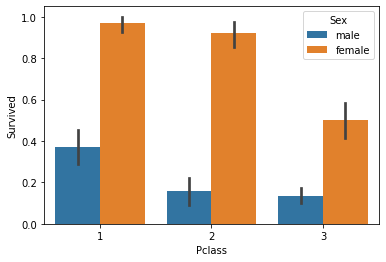

In [ ]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train)

데이터 예측

# 레이블 인코딩
문자열(object)칼럼 피처를 숫자형으로 변환\
def format_features(df):\
    df['Cabin'] =df['Cabin'].str[0]\
    features = ['Cabin','Sex','Embarked']\
    for feature in features:\
        le = LabelEncoder() # 선언\
        le = le.fit(df[feature])\
        피처에 대한 데이터프레임으로  인코딩생성
        df[feature] = le.transform(df[feature]) # 피처에 인코딩한것으로 변환\

      ###  이거 모르면 예측검증 못함##

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#알고리즘에 불필요한 칼럼 제거
train = train.drop(['PassengerId','Name','Ticket'],axis=1, inplace=True)

In [ ]:
def fillna(df):    
    df['Age']=df['Age'].fillna(df['Age'].mean())
    df['Cabin']=df['Cabin'].fillna('N')
    df['Embarked']=df['Embarked'].fillna('N')
    df['Fare']=df['Fare'].fillna(0)

In [ ]:
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

In [ ]:
def format_features(df):
    df['Cabin'] =df['Cabin'].str[0]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder() # 선언
        le = le.fit(df[feature]) # 피처에 대한 데이터프레임으로 인코딩생성
        df[feature] = le.transform(df[feature]) # 피처에 인코딩한것으로 변환
        
    return df


In [ ]:
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    
    return df

In [ ]:
y_titanic_df = train['Survived']
X_titanic_df = train.drop(labels='Survived', axis=1)

In [ ]:
X_titanic_df = transform_features(X_titanic_df)

AttributeError: ignored

In [ ]:
# from sklearn import preprocessing
# 레이블 인코딩
def format_features(df):
    df['Cabin'] = df['Cabin'].str[0]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder() # 선언
        le = le.fit(df[feature]) # 피처에 대한 데이터프레임으로 인코딩생성
        df[feature] = le.transform(df[feature]) # 피처에 인코딩한것으로 변환
    return df

In [ ]:
file_df=format_features(train)
file_df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,8,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,8,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,8,2


In [ ]:
# 가공한 학습테이터 셋 분리
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11 )

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier(random_state=11)



In [ ]:
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('랜덤포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))


ValueError: ignored

In [ ]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,7,2
1,1,1,0,38.000000,1,0,71.2833,2,0
2,1,3,0,26.000000,0,0,7.9250,7,2
3,1,1,0,35.000000,1,0,53.1000,2,2
4,0,3,1,35.000000,0,0,8.0500,7,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,7,2
887,1,1,0,19.000000,0,0,30.0000,1,2
888,0,3,0,29.699118,1,2,23.4500,7,2
889,1,1,1,26.000000,0,0,30.0000,2,0
